# Download flower 

In [31]:
import os

url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
filename = url.split('/')[-1]

download_dir = 'datasets/flowers'
file_path = os.path.join(download_dir, filename)

In [32]:
import os
import urllib.request
import zipfile
import tarfile

if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [33]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Create flower_classes list

In [34]:
FLOWERS_PATH = os.path.join("datasets", "flowers")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")

In [35]:
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])

In [36]:
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Create image_paths dict 

In [51]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [52]:
print(type(image_paths))

<class 'collections.defaultdict'>


In [53]:
print(type(image_paths['daisy']))

<class 'list'>


In [54]:
for cls in flower_classes:
    print(image_paths[cls][0:3])
    image_paths[cls].sort()
    print(image_paths[cls][0:3])

['datasets/flowers/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg', 'datasets/flowers/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg', 'datasets/flowers/flower_photos/daisy/476857510_d2b30175de_n.jpg']
['datasets/flowers/flower_photos/daisy/100080576_f52e8ee070_n.jpg', 'datasets/flowers/flower_photos/daisy/10140303196_b88d3d6cec.jpg', 'datasets/flowers/flower_photos/daisy/10172379554_b296050f82_n.jpg']
['datasets/flowers/flower_photos/dandelion/9965757055_ff01b5ee6f_n.jpg', 'datasets/flowers/flower_photos/dandelion/461632542_0387557eff.jpg', 'datasets/flowers/flower_photos/dandelion/4572738670_4787a11058_n.jpg']
['datasets/flowers/flower_photos/dandelion/10043234166_e6dd915111_n.jpg', 'datasets/flowers/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg', 'datasets/flowers/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg']
['datasets/flowers/flower_photos/roses/16209331331_343c899d38.jpg', 'datasets/flowers/flower_photos/roses/5777669976_a205f61e5b.jpg', 'datasets/flowers/flowe

In [55]:
import matplotlib.image as mpimg
import numpy as np

n_examples_per_class = 2

for flower_class in flower_classes:
    for i in range(n_examples_per_class):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        msg = 'class: {:>10s}, max: {}, min: {}'
        print(msg.format(flower_class, np.max(example_image), np.min(example_image)))

class:      daisy, max: 238, min: 0
class:      daisy, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:      roses, max: 255, min: 0
class:      roses, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class:     tulips, max: 255, min: 0
class:     tulips, max: 255, min: 0


Class: daisy


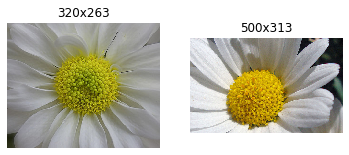

Class: dandelion


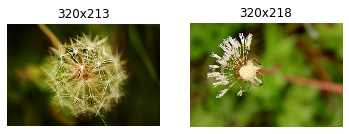

Class: roses


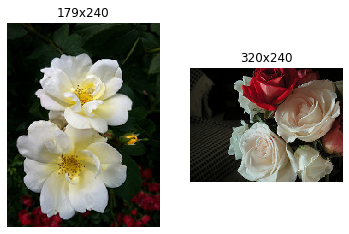

Class: sunflowers


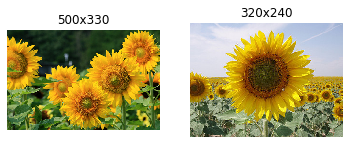

Class: tulips


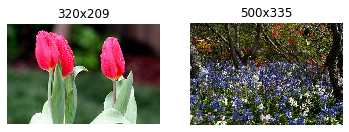

In [56]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

n_examples_per_class = 5

for flower_class in flower_classes:
    print("Class:", flower_class)
    fig, axes = plt.subplots(1, 2)
    for i, ax in enumerate(axes):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        ax.set_title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        ax.imshow(example_image)
        ax.axis("off")
    plt.show()

# Random Cropping

In [61]:
from skimage.transform import resize
import numpy as np

def prepare_image(image, target_width=299, target_height=299, max_zoom=0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box size that fits within the image
    height, width = image.shape[0], image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    image = image[y0:y1, x0:x1] # crop the image
    if np.random.rand() < 0.5: image = np.fliplr(image) # fliplr with 50% probability

    # Now, let's resize the image to the target dimensions.
    # scikit-image will automatically transform the image to floats ranging from 0.0 to 1.0
    image = resize(image, (target_width, target_height))

    return image.astype(np.float32) # represented as 32-bit floats

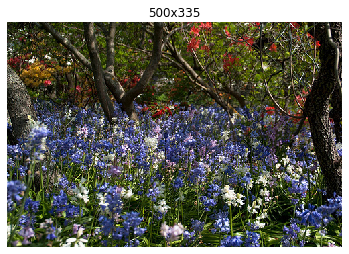

In [62]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

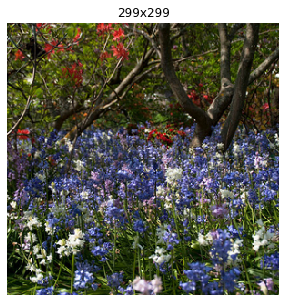

In [65]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(5, 5))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

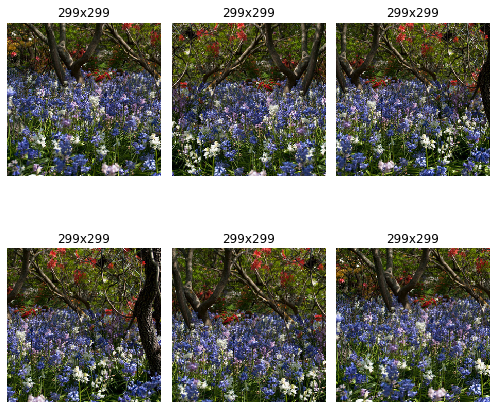

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(7, 7))
for ax in axes.reshape((-1,)):
    prepared_image = prepare_image(example_image)
    ax.set_title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
    ax.imshow(prepared_image)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Random Cropping with TensorFlow

In [73]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [74]:
def pre_process_image(image, training):
    """Zooms and crops the image randomly for data augmentation."""
    image = image / 255.
    
    target_height = 299
    target_width = 299
    num_channels = 3
    
    if training:

        # Randomly crop the input image.
        image = tf.random_crop(image, size=[target_height, target_width, num_channels])

        # Randomly flip the image horizontally.
        image = tf.image.random_flip_left_right(image)
        
        # Randomly adjust hue, contrast and saturation.
        image = tf.image.random_hue(image, max_delta=0.05)
        image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_saturation(image, lower=0.0, upper=2.0)

        # Limit the image pixels between [0, 1] in case of overflow.
        image = tf.minimum(image, 1.0)
        image = tf.maximum(image, 0.0)
        
    else:
        # Crop the input image around the centre so it is the same
        # size as images that are randomly cropped during training.
        image = tf.image.resize_image_with_crop_or_pad(image,
                                                       target_height=target_height,
                                                       target_width=target_width)
    return image

In [75]:
def pre_process(images_placeholder, training):
    images = tf.map_fn(lambda image: pre_process_image(image, training), images_placeholder)
    return images

In [76]:
x = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='x')
distorted_images = pre_process(images_placeholder=x, training=True)
resized_images = pre_process(images_placeholder=x, training=False)

(1, 299, 299, 3) 1.0 0.0


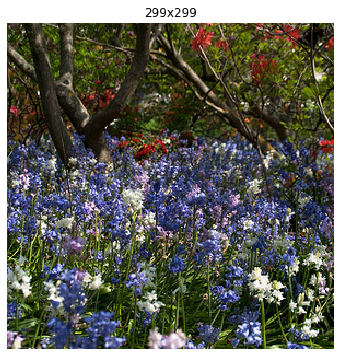

In [77]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = resized_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()

(1, 299, 299, 3) 0.68254066 0.08407079


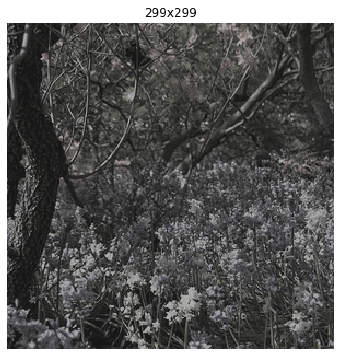

In [78]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = distorted_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()